# Esercizio 1/3 

Estraiamo la tabella dimproduct dal database AdventureWorks, e valutiamo quanto segue:
* Quanti dati ci sono in totale? 
* Quali sono i metadati? 
* Stampiamo il primo elemento 
* Stampiamo l'ultimo elemento
* Riusciamo a stampare cinque elementi a caso?
* Quali sono i colori disponibili?

In [1]:
from sqlalchemy import create_engine
import dotenv
import os
import pandas as pd
dotenv.load_dotenv(override=True)
username = os.getenv('username')
password = os.getenv('password')
host = os.getenv('host')
dbname = os.getenv('dbname')

import pandas as pd
dbname = "AdventureWorksDW"
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)
query = """SELECT *
        FROM dimproduct
        """
df = pd.read_sql(query, db_engine)

In [2]:
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape # in totale abbiamo 606 righe e 36 colonne

(606, 36)

In [4]:
df.columns # elenco le colonne

Index(['ProductKey', 'ProductAlternateKey', 'ProductSubcategoryKey',
       'WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'EnglishProductName',
       'SpanishProductName', 'FrenchProductName', 'StandardCost',
       'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint',
       'ListPrice', 'Size', 'SizeRange', 'Weight', 'DaysToManufacture',
       'ProductLine', 'DealerPrice', 'Class', 'Style', 'ModelName',
       'LargePhoto', 'EnglishDescription', 'FrenchDescription',
       'ChineseDescription', 'ArabicDescription', 'HebrewDescription',
       'ThaiDescription', 'GermanDescription', 'JapaneseDescription',
       'TurkishDescription', 'StartDate', 'EndDate', 'Status'],
      dtype='object')

In [5]:
df.head(1)  # primo elemento del db

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
0,1,AR-5381,NaN,None,None,Adjustable Race,,,NaN,0,...,None,None,None,None,None,None,None,2003-07-01,NaT,Current


In [6]:
df.tail(1)  # ultimo elemento del db

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
605,606,BK-R19B-52,2.0,LB,CM,"Road-750 Black, 52","Carretera: 750, negra, 52","Vélo de route 750 noir, 52",343.65,1,...,入门级成人自行车；确保越野旅行或公路骑乘的舒适。快拆式车毂和轮缘。,إنها دراجة مناسبة للمبتدئين من البالغين؛ فهي ت...,"אופני מבוגרים למתחילים; מציעים רכיבה נוחה ""מחו...",จักรยานระดับเริ่มต้นสำหรับผู้ใหญ่ ให้ความสบายใ...,Ein Erwachsenenrad für Einsteiger; bietet Komf...,エントリー レベルに対応する、クロスカントリーにも街への買い物にも快適な、大人の自転車。ハブ...,"""Başlangıç seviyesinde yetişkin bisikleti, kır...",2013-07-01,NaT,Current


In [7]:
df.sample(5)  # 5 elementi ramndon

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,SpanishProductName,FrenchProductName,StandardCost,FinishedGoodsFlag,...,ChineseDescription,ArabicDescription,HebrewDescription,ThaiDescription,GermanDescription,JapaneseDescription,TurkishDescription,StartDate,EndDate,Status
506,507,FR-T67Y-50,16.0,LB,CM,"LL Touring Frame - Yellow, 50","Cuadro de paseo GB: amarillo, 50","Cadre de vélo de randonnée LL - jaune, 50",199.85,1,...,轻型一体式铝制车架，可以更直立的骑乘姿势进行环城游。我们开创性的设计提供了最佳舒适度。,يوفر هيكل الألومنيوم سميك الأطراف خفيف الوزن و...,מסגרת קלת משקל מאלומיניום חרוץ מספקת תנוחת רכי...,เฟรมอลูมิเนียมน้ำหนักเบา ทำให้ท่วงท่าในการขับข...,Leichter Aluminiumrahmen für aufrechte Sitzhal...,軽量接合アルミニウム フレームにより、街乗りに適したアップライトなライディング ポジションを...,"""Hafif alüminyum kadrosu, şehirde yaptığınız y...",2013-07-01,NaT,Current
387,388,BK-R64Y-44,2.0,LB,CM,"Road-550-W Yellow, 44","Carretera: 550 para mujer, amarilla, 44","Vélo de route 550 -W - jaune, 44",713.08,1,...,使用的技术与我们所有的公路系列自行车完全相同，但车架尺寸专为女士设计。完美的全能自行车，可作...,ولها نفس التقنية المتوفرة في جميع دراجات سلسلة...,"טכנולוגיה זהה לזו המצוי באופני סדרת ""כביש"" שלנ...",เทคโนโลยีเดียวกับจักรยานรุ่น Road ทั้งหมด แต่ใ...,Dieselbe Technologie wie bei allen Rädern unse...,ロード シリーズの自転車と同じ技術を使用した女性用サイズのフレームで、ロードにも競技にも適し...,"""Yol serisi bisikletlerimizle aynı teknoloji, ...",2013-07-01,NaT,Current
384,385,BK-R64Y-42,2.0,LB,CM,"Road-550-W Yellow, 42","Carretera: 550 para mujer, amarilla, 42","Vélo de route 550 -W - jaune, 42",605.65,1,...,使用的技术与我们所有的公路系列自行车完全相同，但车架尺寸专为女士设计。完美的全能自行车，可作...,ولها نفس التقنية المتوفرة في جميع دراجات سلسلة...,"טכנולוגיה זהה לזו המצוי באופני סדרת ""כביש"" שלנ...",เทคโนโลยีเดียวกับจักรยานรุ่น Road ทั้งหมด แต่ใ...,Dieselbe Technologie wie bei allen Rädern unse...,ロード シリーズの自転車と同じ技術を使用した女性用サイズのフレームで、ロードにも競技にも適し...,"""Yol serisi bisikletlerimizle aynı teknoloji, ...",2012-07-01,2008-12-27,None
463,464,GL-H102-M,20.0,None,None,"Half-Finger Gloves, M",,,9.71,1,...,完全填充、手指活动更自如、手掌材质更耐用、大小可调。,قفاز يد ذو حشوة كاملة، وثنية أصابع محسنة، وغطا...,"ריפוד מלא, אפשרות כיפוף משופרת לאצבעות, עמידות...",บุเต็มทุกส่วน เพิ่มการยืดหยุ่นของนิ้ว แผ่นฝ่าม...,"""Vollständig gepolstert, verbesserte Flexibili...",フル パディング、改良された指部分の伸縮性、耐久性のある手のひら部分、調整可能なはめ口。,"""Ful pedli, geliştirilmiş parmak esnekliği, da...",2012-07-01,2008-12-27,None
347,348,BK-M82B-38,1.0,LB,CM,"Mountain-100 Black, 38","Montaña: 100, negra, 38","VTT 100 noir, 38",1898.09,1,...,高档竞赛山地车。性能得到进一步增强，包括创新的 HL 车架、极其平稳的前悬架以及适用于所有地...,دراجة سباقات مخصصة للقيادة في الجبال من أعلى ط...,אופני הרים תחרותיים מהשורה הראשונה. אפשרויות ל...,สุดยอดจักรยานภูเขาสำหรับการแข่งขัน สมบูรณ์แบบด...,"""Top-Mountainbike für Profis. Mit innovativem ...",最高級の競技用マウンテン バイクです。性能強化オプションとしては、革新的な HL フレーム、...,"""En üst model rekabetçi dağ bisikleti. Perform...",2011-07-01,2007-12-28,None


In [8]:
df['Color']

0         NA
1         NA
2         NA
3         NA
4         NA
       ...  
601       NA
602       NA
603    Black
604    Black
605    Black
Name: Color, Length: 606, dtype: object

In [9]:
df['Color'].unique() # i colori univoci presenti

array(['NA', 'Black', 'Silver', 'Red', 'White', 'Blue', 'Multi', 'Yellow',
       'Grey', 'Silver/Black'], dtype=object)

# Esercizio 2/3
* In media quanto pesano i prodotti?
* Quanto pesa il più leggero?
* Quanto pesa il più pesante?
* Quanti prodotti pesano più di 100 Kg?
* Quanto costano in media i prodotti (colonna DealerPrice)?
* Se prendiamo un quarto di tutti i prodotti, in modo che siano i più costosi, quale sarà il loro range di prezzo?

In [10]:
peso_describe=df['Weight'].describe() #  56,19kg, il prodotto più leggero pesa: 2,12kg il più pesante: 1050,00kg
print('peso medio dei prodotti:',peso_describe['mean'],'kg')
print('prodotto più leggero pesa:',peso_describe['min'],'kg')
print('prodotto più pesante pesa:',peso_describe['max'],'kg')

peso medio dei prodotti: 56.1932269503546 kg
prodotto più leggero pesa: 2.12 kg
prodotto più pesante pesa: 1050.0 kg


In [11]:
prodotti_maggiori_100kg=df['Weight']>100

In [12]:
a=df.loc[prodotti_maggiori_100kg].describe() # i prodotti che superano i 100kg sono 28 rows 

In [13]:
print('il numero di prodotti che pesano più di 100kg sono:',a.iloc[0,0])

il numero di prodotti che pesano più di 100kg sono: 28.0


In [14]:
print('i prodotti costano in media:',df['DealerPrice'].mean(),'$')   

i prodotti costano in media: 448.5970597468353 $


In [15]:
print('il quarto dei prodotti più costosi va da:',df['DealerPrice'].describe()['75%'],'$','a:',df['DealerPrice'].describe()['max'],'$')

il quarto dei prodotti più costosi va da: 722.5949 $ a: 2146.962 $


# Esercizio 3/3
* Qual è il prezzo medio per i prodotti di colore blu?
* Qual è il prezzo medio per i prodotti di colore rosso o nero?
* Qual è il prezzo massimo per i prodotti di taglia 42 e peso oltre i 10 Kg?
* Qual è il nome inglese e il costo di produzione (StandardCost) di tutti i prodotti di taglia 42, peso oltre i 10 Kg e colore argento?
* Esaminiamo la differenza tra lo StandardCost e il DealerPrice degli ultimi 20 elementi del dataset: c'è un pattern? C'è qualche elemento che non lo segue?

In [16]:
prodotti_blu=df['Color']=='Blue'

In [17]:
print('il prezzo medio per i prodotti di colore blu è:',df.loc[prodotti_blu]['DealerPrice'].mean(),'$')

il prezzo medio per i prodotti di colore blu è: 516.0631785714286 $


In [18]:
prodotti_nero=df['Color']=='Black'
prodotti_rosso=df['Color']=='Red'
print('il prezzo medio per i prodotti di colore Rosso o Nero è:',(df.loc[prodotti_rosso | prodotti_nero])['DealerPrice'].mean(),'$')

il prezzo medio per i prodotti di colore Rosso o Nero è: 550.2481873684211 $


In [19]:
prodotti_taglia_42=df['Size']=='42'
prodotti_peso_maggiore_10_kg=df['Weight']>10
print('il prezzo massimo per i prodotti di taglia 42 e peso oltre i 10kg è:',(df.loc[prodotti_taglia_42 & prodotti_peso_maggiore_10_kg])['DealerPrice'].max(),'$')


il prezzo massimo per i prodotti di taglia 42 e peso oltre i 10kg è: 2039.994 $


In [20]:
prezzo=df['DealerPrice']==2039.994 # prova per il prezzo di 2039.994$ se taglia 42 e peso >10kg
dfprezzo=df.loc[prezzo]
dfprezzo.loc[:,['Size','Weight','DealerPrice']]

,Size,Weight,DealerPrice
343,38,20.35,2039.994
344,42,20.77,2039.994
345,44,21.13,2039.994
346,48,21.42,2039.994


In [21]:
df.columns 

Index(['ProductKey', 'ProductAlternateKey', 'ProductSubcategoryKey',
       'WeightUnitMeasureCode', 'SizeUnitMeasureCode', 'EnglishProductName',
       'SpanishProductName', 'FrenchProductName', 'StandardCost',
       'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint',
       'ListPrice', 'Size', 'SizeRange', 'Weight', 'DaysToManufacture',
       'ProductLine', 'DealerPrice', 'Class', 'Style', 'ModelName',
       'LargePhoto', 'EnglishDescription', 'FrenchDescription',
       'ChineseDescription', 'ArabicDescription', 'HebrewDescription',
       'ThaiDescription', 'GermanDescription', 'JapaneseDescription',
       'TurkishDescription', 'StartDate', 'EndDate', 'Status'],
      dtype='object')

In [22]:
prodotti_taglia_42=df['Size']=='42'
prodotti_peso_maggiore_10_kg=df['Weight']>10
prodotti_silver=df['Color']=='Silver'
prodotti_richiesti=df.loc[prodotti_taglia_42 & prodotti_peso_maggiore_10_kg & prodotti_silver]
prodotti_richiesti.loc[:,('Size','Weight','Color','EnglishProductName','StandardCost')]

,Size,Weight,Color,EnglishProductName,StandardCost
344,42,20.77,Silver,"Mountain-100 Silver, 42",1912.15
353,42,23.77,Silver,"Mountain-200 Silver, 42",1117.86
354,42,23.77,Silver,"Mountain-200 Silver, 42",1265.62
588,42,27.13,Silver,"Mountain-400-W Silver, 42",419.78
591,42,27.77,Silver,"Mountain-500 Silver, 42",308.22


In [23]:
df.tail(20)[['StandardCost','DealerPrice']] # il pattern è che il DealerPrice è sempre superiore allo StandardCost,
                                                # ad eccezione degli ultimi tre prodotti per cui la tendenza si capovolge

,StandardCost,DealerPrice
586,419.78,461.694
587,419.78,461.694
588,419.78,461.694
589,419.78,461.694
590,308.22,338.994
591,308.22,338.994
592,308.22,338.994
593,308.22,338.994
594,308.22,338.994
595,294.58,323.994


<Axes: >

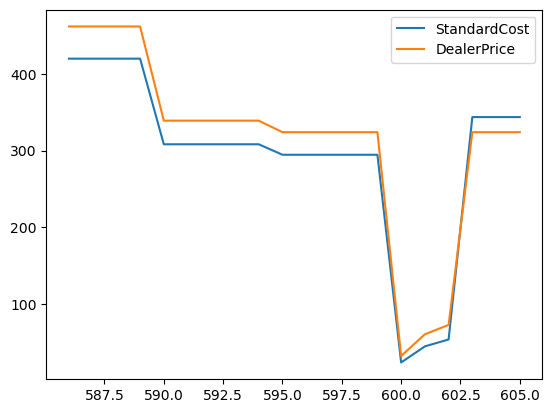

In [24]:
df.tail(20)[['StandardCost','DealerPrice']].plot() # per ottenere un grafico dove la linea rossa è sempre sopra la blu,
                                                   # tranne che per gli ultimi tre prodotti

# Esercizio 

Tra i beginner datasets scaricabili all'indirizzo 

https://www.kaggle.com/datasets/ahmettezcantekin/beginner-datasets selezioniamo amazon.csv, un dataset contenente una serie di recensioni su Amazon.
* Valutiamo la dimensione del dataset
* Visualizziamo dieci righe a caso;
* Osserviamo quali sono i nomi di colonna;
* Il dataset è bilanciato, ovvero, il numero di recensioni positive è uguale a quello delle negative, oppure no?

In [25]:
percorso_attuale=os.getcwd()
path='\\beginner_datasets\\amazon.csv'
dfa=pd.read_csv(percorso_attuale+path)

In [26]:
dfa.shape

(20000, 2)

In [27]:
dfa.sample(10)

,reviewText,Positive
4901,This was a free app that I downloaded for my K...,1
14683,ignoring them is best. This is a great origina...,1
9288,this app is LAME I thought it was something be...,0
14318,This is a collection of guided meditations cov...,1
6153,Love the idea. The application has a very nic...,1
7488,This bible is cool just for the fact you don't...,1
17062,"Downloaded yesterday, so far does all I need i...",1
8813,Not worth the download. There are plenty of ap...,0
164,if you don't know what this series of games is...,1
8092,I already downloaded a couple if songs to mp3 ...,1


In [28]:
dfa.columns

Index(['reviewText', 'Positive'], dtype='object')

In [29]:
dfa.describe() # non è bilanciato si vede già che meno del 25% è zero

,Positive
count,20000.000000
mean,0.761650
std,0.426085
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [30]:
dfa['Positive'].value_counts() # gli zero sono 4.767 su 20.000 il 23%

Positive
1    15233
0     4767
Name: count, dtype: int64

# Esercizio 

Il dataset diabetes.csv raccoglie persone con diabete o meno, e il valore di diverse variabili fisiologiche dei pazienti. 
* Osserviamone le dimensioni e un'anteprima di cinque righe;
* Prendiamoci un po' di tempo per dare un'occhiata ai metadati delle colonne;
* Stampiamo dei descrittori statistici del dataset;
* Selezioniamo i dati relativi a diverse fasce di età: <20, 20-30, 30-40, 40-50, >50;
* Qual è la media della pressione sanguigna diastolica per le diverse fasce di età?
* Qual è la media della pressione per ogni singolo anno di età?

In [31]:
percorso_attuale=os.getcwd()
path='\\beginner_datasets\\diabetes.csv'
dfd=pd.read_csv(percorso_attuale+path)

In [32]:
dfd.shape

(768, 9)

In [33]:
dfd.sample(5)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
154,8,188,78,0,0,47.9,0.137,43,1
513,2,91,62,0,0,27.3,0.525,22,0
186,8,181,68,36,495,30.1,0.615,60,1
49,7,105,0,0,0,0.0,0.305,24,0
51,1,101,50,15,36,24.2,0.526,26,0


In [34]:
dfd.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
dfd.columns

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Class variable'],
      dtype='object')

In [36]:
# pressione media per fasce d'età
fascia_0_20=dfd['Age (years)']<20   
fascia_20_30=(dfd['Age (years)']>=20) & (dfd['Age (years)']<30)
fascia_30_40=(dfd['Age (years)']>=30) & (dfd['Age (years)']<40)
fascia_40_50=(dfd['Age (years)']>=40) & (dfd['Age (years)']<50)
fascia_50_81=dfd['Age (years)']>=50

In [37]:
filtri={"0_20":fascia_0_20,"20_30":fascia_20_30,"30_40":fascia_30_40,"40_50":fascia_40_50,"50_81":fascia_50_81}
for nome_filtro in filtri:
    filtro=filtri[nome_filtro]
    print('pressione media fascia',nome_filtro,':',dfd.loc[filtro]['Diastolic blood pressure (mm Hg)'].mean())


pressione media fascia 0_20 : nan
pressione media fascia 20_30 : 65.34848484848484
pressione media fascia 30_40 : 69.66666666666667
pressione media fascia 40_50 : 73.94067796610169
pressione media fascia 50_81 : 78.37078651685393


In [38]:
# pressione media per età
dfd.groupby('Age (years)')['Diastolic blood pressure (mm Hg)'].mean()

Age (years)
21    65.936508
22    63.722222
23    64.315789
24    64.956522
25    59.666667
26    64.181818
27    73.500000
28    68.314286
29    68.241379
30    64.857143
31    64.375000
32    70.062500
33    65.647059
34    74.000000
35    75.600000
36    69.125000
37    75.947368
38    71.125000
39    72.666667
40    69.230769
41    67.590909
42    73.388889
43    78.461538
44    61.750000
45    83.066667
46    76.000000
47    78.333333
48    78.400000
49    81.400000
50    78.250000
51    84.500000
52    81.500000
53    79.000000
54    89.333333
55    70.250000
56    76.333333
57    76.800000
58    78.285714
59    74.000000
60    80.000000
61    76.000000
62    71.500000
63    78.000000
64    78.000000
65    78.666667
66    86.000000
67    72.666667
68    82.000000
69    81.000000
70    82.000000
72     0.000000
81    74.000000
Name: Diastolic blood pressure (mm Hg), dtype: float64

# Esercizio 

Il dataset insurance.csv contiene dati rispetto a caratteristiche e abitudini delle persone, e della zona in cui vivono, rispetto ai costi individuali per le cure mediche come premio per le assicurazioni sulla salute.
* Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna;
* Quali sono le medie di charges rispetto a region? Ci sono differenze significative?
* E rispetto a smoker? E a sex? • Quali sono i descrittori statistici di bmi? Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi?

In [39]:
percorso_attuale=os.getcwd()
path='\\beginner_datasets\\insurance.csv'
dfi=pd.read_csv(percorso_attuale+path)

In [40]:
dfi.shape

(1338, 7)

In [41]:
dfi.sample(10)

,age,sex,bmi,children,smoker,region,charges
328,64,female,33.800,1,yes,southwest,47928.03000
343,63,male,36.765,0,no,northeast,13981.85035
929,41,male,34.210,1,no,southeast,6289.75490
1083,32,male,31.500,1,no,southwest,4076.49700
412,26,female,17.195,2,yes,northeast,14455.64405
669,40,female,29.810,1,no,southeast,6500.23590
508,24,female,25.270,0,no,northeast,3044.21330
32,19,female,28.600,5,no,southwest,4687.79700
415,43,female,35.640,1,no,southeast,7345.72660
155,44,male,39.520,0,no,northwest,6948.70080


In [42]:
dfi.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [43]:
dfi.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [44]:
dfi['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [45]:
dfigr=dfi.groupby('region')

In [46]:
dfigr.charges.mean()  # nel west il premio è più basso rispetto a heast e 
                      # nel sud-est il prezzo è il più alto

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [47]:
dfigs=dfi.groupby('smoker')  # per i fumatori il premio è molto più alto
dfigs.charges.mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [48]:
dfigx=dfi.groupby('sex') # per i maschi il premio è più alto
dfigx.charges.mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [49]:
bmid=dfi.bmi.describe()
bmid

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [50]:
#min, media, max del premio per il primo quartile
inizio="min"
fine="25%"
filtro_bmi=(bmid[inizio]<dfi.bmi)&(dfi.bmi<=bmid[fine])
query_bmi=dfi.loc[filtro_bmi]
print('min:',query_bmi.charges.min(),'media:',query_bmi.charges.mean(),'max:',query_bmi.charges.max())                               

min: 1121.8739 media: 10386.608533353294 max: 38245.59327


In [51]:
#min, media, max del premio per il secondo quartile
inizio="25%"
fine="50%"
filtro_bmi=(bmid[inizio]<dfi.bmi)&(dfi.bmi<=bmid[fine])
query_bmi=dfi.loc[filtro_bmi]
print('min:',query_bmi.charges.min(),'media:',query_bmi.charges.mean(),'max:',query_bmi.charges.max())                               

min: 1131.5066 media: 11407.831467689348 max: 62592.87309


In [52]:
#min, media, max del premio per il terzo quartile
inizio="50%"
fine="75%"
filtro_bmi=(bmid[inizio]<dfi.bmi)&(dfi.bmi<=bmid[fine])
query_bmi=dfi.loc[filtro_bmi]
print('min:',query_bmi.charges.min(),'media:',query_bmi.charges.mean(),'max:',query_bmi.charges.max())                               

min: 1135.9407 media: 14358.17308081818 max: 60021.39897


In [53]:
#min, media, max del premio per il quarto quartile
inizio="75%"
fine="max"
filtro_bmi=(bmid[inizio]<dfi.bmi)&(dfi.bmi<=bmid[fine])
query_bmi=dfi.loc[filtro_bmi]
print('min:',query_bmi.charges.min(),'media:',query_bmi.charges.mean(),'max:',query_bmi.charges.max())                               

min: 1141.4451 media: 16987.936690955226 max: 63770.42801


# Esercizio 1/2 

Il dataset pokemon.csv contiene un database di Pokémon, con dati quali nome, tipi di attacco, valori di attacco/difesa/eccetera, e se sono o meno leggendari. 
* Verifichiamo la dimensione, un'anteprima e osserviamo i nomi di colonna; 
* È verosimile che la prima colonna dovrebbe essere un indice? 
* Confrontiamolo con l'indice messo automaticamente da Pandas: combaciano? 
* Se no, settare la prima colonna come indice.

In [54]:
percorso_attuale=os.getcwd()
path='\\beginner_datasets\\pokemon.csv'
dfp=pd.read_csv(percorso_attuale+path)

In [55]:
dfp.shape

(800, 13)

In [56]:
dfp.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [57]:
dfp.sample(10)  # gli indici non combaciano, alcuni sono ripetuti ma hanno lo stesso nome

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
210,195,Quagsire,Water,Ground,430,95,85,85,65,65,35,2,False
194,180,Flaaffy,Electric,NaN,365,70,55,55,80,60,45,2,False
671,610,Axew,Dragon,NaN,320,46,87,60,30,40,57,5,False
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
689,628,Braviary,Normal,Flying,510,100,123,75,57,75,80,5,False
654,593,Jellicent,Water,Ghost,480,100,60,70,85,105,60,5,False
708,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
392,359,Absol,Dark,NaN,465,65,130,60,75,60,75,3,False
698,637,Volcarona,Bug,Fire,550,85,60,65,135,105,100,5,False


In [58]:
dfp.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [59]:
dfp.set_index("#", inplace=True)
dfp.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Esercizio 2/2 
* Quali sono i Pokémon leggendari? 
* E quali sono i leggendari di tipo 1 Grass?
* E leggendari di tipo 1 Ice o Fire?
* Ordiniamo il dataset per la colonna Name; 
* Trasformiamo Name nell'indice; 
* Quali sono i Pokémon della prima generazione con attacco > 50 e HP < 60?

In [60]:
filtro_legendario=dfp.Legendary  # è legendario se uguale a True
dfp.loc[filtro_legendario]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [61]:
filtro_grass =dfp["Type 1"] == "Grass"
dfp.loc[filtro_legendario&filtro_grass]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True
492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True
640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True


In [62]:
filtro_ice=dfp["Type 1"] == "Ice"
filtro_fire=dfp["Type 1"] == "Fire"
dfp.loc[filtro_legendario&(filtro_ice|filtro_fire)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [63]:
dfp.set_index("Name", inplace=True)
dfp.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [70]:
dfp.dtypes

Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [74]:
filtro_gen=dfp.Generation==1
filtro_atk=dfp.Attack>50
filtro_hp=dfp.HP<60
filtro_completo=dfp.loc[filtro_gen&filtro_atk&filtro_hp]
filtro_completo

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
Rattata,Normal,NaN,253,30,56,35,25,35,72,1,False
Raticate,Normal,NaN,413,55,81,60,50,70,97,1,False
Spearow,Normal,Flying,262,40,60,30,31,31,70,1,False
Ekans,Poison,NaN,288,35,60,44,40,54,55,1,False
Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False
